In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantbullet.parametic_model import BathtubModel, AsymQuadModel, InterpolatedModel

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic data for testing
x = np.linspace(5, 10, 30)
true_params = {'a': 1, 'b': 1, 'x0': 5, 'c': 0}

# Create true model and generate noisy data
true_model = AsymQuadModel(true_params)
y_true = true_model.predict(x)
y_noisy = y_true + np.random.normal(0, 1, len(y_true))

print(f"Generated {len(x)} data points")
print(f"True parameters: {true_params}")
print(f"Data range: x=[{x.min():.2f}, {x.max():.2f}], y=[{y_noisy.min():.2f}, {y_noisy.max():.2f}]")

Generated 30 data points
True parameters: {'a': 1, 'b': 1, 'x0': 5, 'c': 0}
Data range: x=[5.00, 10.00], y=[0.06, 29.71]


In [3]:
# Fit parametric model to noisy data
print("Fitting parametric model...")
model = AsymQuadModel(allow_extrapolation=False)
model = model.fit(x, y_noisy)

Fitting parametric model...


In [4]:
# Create interpolated model from parametric model
print("Creating interpolated model...")
interp_linear = InterpolatedModel.from_parametric_model(model, extrapolation="linear")
interp_flat = InterpolatedModel.from_parametric_model(model, extrapolation="flat")

Creating interpolated model...


In [5]:
# Test predictions on original data range
print("Testing predictions on original data range...")
y_pred_parametric = model.predict(x)
y_pred_interp_linear = interp_linear.predict(x)
y_pred_interp_flat = interp_flat.predict(x)

Testing predictions on original data range...



Testing extrapolation beyond training data...


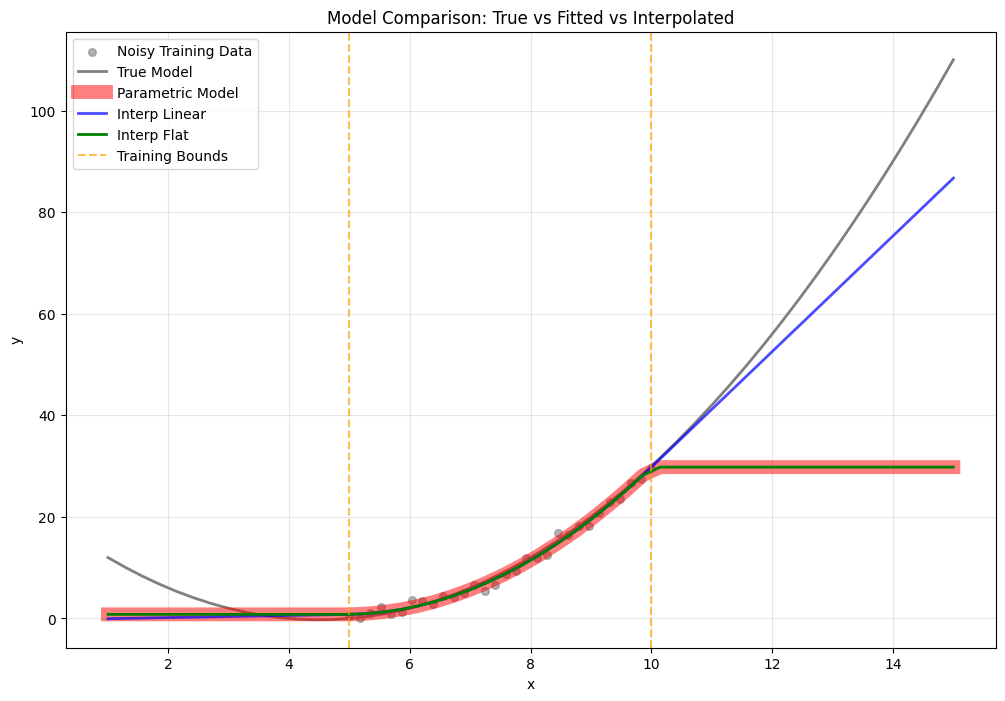

Training data range: [5.0, 10.0]
Test range: [1.0, 15.0]
Extrapolation range: [1.0, 5.0] and [10.0, 15.0]


In [6]:
# Test extrapolation beyond training data
print("\nTesting extrapolation beyond training data...")
x_extended = np.linspace(1, 15, 50)

# True model predictions (ground truth)
y_true_extended = true_model.predict(x_extended)

# Parametric model predictions (with clipping due to allow_extrapolation=False)
y_pred_parametric_ext = model.predict(x_extended)

# Interpolated model predictions
y_pred_interp_linear_ext = interp_linear.predict(x_extended)
y_pred_interp_flat_ext = interp_flat.predict(x_extended)

# Plot comparison
plt.figure(figsize=(12, 8))

# Plot original data points
plt.scatter(x, y_noisy, alpha=0.6, color='gray', label='Noisy Training Data', s=30)

# Plot true model
plt.plot(x_extended, y_true_extended, 'gray', linewidth=2, label='True Model')

# Plot parametric model
plt.plot(x_extended, y_pred_parametric_ext, 'red', linewidth=10, label='Parametric Model', alpha=0.5)

# Plot interpolated models
plt.plot(x_extended, y_pred_interp_linear_ext, 'b', linewidth=2, label='Interp Linear', alpha=0.7)
plt.plot(x_extended, y_pred_interp_flat_ext, 'g', linewidth=2, label='Interp Flat')

# Mark training bounds
plt.axvline(x=model.left_bound_, color='orange', linestyle='--', alpha=0.7, label='Training Bounds')
plt.axvline(x=model.right_bound_, color='orange', linestyle='--', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison: True vs Fitted vs Interpolated')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print extrapolation analysis
print(f"Training data range: [{model.left_bound_}, {model.right_bound_}]")
print(f"Test range: [{x_extended.min()}, {x_extended.max()}]")
print(f"Extrapolation range: [{x_extended.min()}, {model.left_bound_}] and [{model.right_bound_}, {x_extended.max()}]")